<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-Store-df-Using-Acquire-Function" data-toc-modified-id="Acquire-Store-df-Using-Acquire-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire Store df Using Acquire Function</a></span><ul class="toc-item"><li><span><a href="#1-3-Exercises-with-Store-df" data-toc-modified-id="1-3-Exercises-with-Store-df-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1-3 Exercises with Store df</a></span></li><li><span><a href="#4.-Date-Parts" data-toc-modified-id="4.-Date-Parts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>4. Date Parts</a></span></li><li><span><a href="#5.-Create-New-Calculated-Column-Using-.assign()" data-toc-modified-id="5.-Create-New-Calculated-Column-Using-.assign()-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>5. Create New Calculated Column Using .assign()</a></span></li><li><span><a href="#6.-Using-.diff()" data-toc-modified-id="6.-Using-.diff()-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>6. Using .diff()</a></span></li><li><span><a href="#7.-Build-Functions" data-toc-modified-id="7.-Build-Functions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>7. Build Functions</a></span></li></ul></li><li><span><a href="#Acuire-OPS-German-Energy-df" data-toc-modified-id="Acuire-OPS-German-Energy-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acuire OPS German Energy df</a></span><ul class="toc-item"><li><span><a href="#1-4-Prepare-German-Energy-df" data-toc-modified-id="1-4-Prepare-German-Energy-df-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1-4 Prepare German Energy df</a></span></li><li><span><a href="#5.-Build-Function" data-toc-modified-id="5.-Build-Function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>5. Build Function</a></span></li></ul></li><li><span><a href="#Acquire-San-Francisco-Temps-DataFrame" data-toc-modified-id="Acquire-San-Francisco-Temps-DataFrame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Acquire San Francisco Temps DataFrame</a></span><ul class="toc-item"><li><span><a href="#1.-Resample-by-the-day-and-take-the-average-temperature.-Visualize-the-average-temperature-over-time." data-toc-modified-id="1.-Resample-by-the-day-and-take-the-average-temperature.-Visualize-the-average-temperature-over-time.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1. Resample by the day and take the average temperature. Visualize the average temperature over time.</a></span></li><li><span><a href="#2.-Write-the-code-necessary-to-visualize-the-minimum-temperature-over-time." data-toc-modified-id="2.-Write-the-code-necessary-to-visualize-the-minimum-temperature-over-time.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2. Write the code necessary to visualize the minimum temperature over time.</a></span></li><li><span><a href="#3.-Write-the-code-necessary-to-visualize-the-maximum-temperature-over-time." data-toc-modified-id="3.-Write-the-code-necessary-to-visualize-the-maximum-temperature-over-time.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3. Write the code necessary to visualize the maximum temperature over time.</a></span></li><li><span><a href="#4.-Which-month-is-the-coldest,-on-average?" data-toc-modified-id="4.-Which-month-is-the-coldest,-on-average?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>4. Which month is the coldest, on average?</a></span></li><li><span><a href="#5.-Which-month-has-the-highest-average-temperature?" data-toc-modified-id="5.-Which-month-has-the-highest-average-temperature?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>5. Which month has the highest average temperature?</a></span></li><li><span><a href="#6.-Resample-by-the-day-and-calculate-the-min-and-max-temp-for-the-day.-Use-this-resampled-dataframe-to-calculate-the-change-in-temperature-for-the-day.-Which-month-has-the-highest-daily-temperature-variability?" data-toc-modified-id="6.-Resample-by-the-day-and-calculate-the-min-and-max-temp-for-the-day.-Use-this-resampled-dataframe-to-calculate-the-change-in-temperature-for-the-day.-Which-month-has-the-highest-daily-temperature-variability?-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>6. Resample by the day and calculate the min and max temp for the day. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?</a></span></li><li><span><a href="#7.-Bonus:-Visualize-the-daily-min,-average,-and-max-temperature-over-time-on-a-single-line-plot." data-toc-modified-id="7.-Bonus:-Visualize-the-daily-min,-average,-and-max-temperature-over-time-on-a-single-line-plot.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot.</a></span></li></ul></li><li><span><a href="#Acquire-flights" data-toc-modified-id="Acquire-flights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Acquire flights</a></span><ul class="toc-item"><li><span><a href="#Convert-df-to-DateTime-Index" data-toc-modified-id="Convert-df-to-DateTime-Index-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Convert df to DateTime Index</a></span></li><li><span><a href="#1.-Convert-any-negative-delays-to-0." data-toc-modified-id="1.-Convert-any-negative-delays-to-0.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>1. Convert any negative delays to 0.</a></span></li><li><span><a href="#2.-Which-hour-of-the-day-has-the-highest-average-delay?" data-toc-modified-id="2.-Which-hour-of-the-day-has-the-highest-average-delay?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>2. Which hour of the day has the highest average delay?</a></span></li><li><span><a href="#3.-Does-the-day-of-the-week-make-a-difference-in-the-delay-amount?" data-toc-modified-id="3.-Does-the-day-of-the-week-make-a-difference-in-the-delay-amount?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>3. Does the day of the week make a difference in the delay amount?</a></span></li><li><span><a href="#4.-Does-the-month-make-a-difference-in-the-delay-amount?" data-toc-modified-id="4.-Does-the-month-make-a-difference-in-the-delay-amount?-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>4. Does the month make a difference in the delay amount?</a></span></li><li><span><a href="#Just-Curious-Stuff..." data-toc-modified-id="Just-Curious-Stuff...-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Just Curious Stuff...</a></span></li></ul></li></ul></div>

In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

import requests
import os
from datetime import timedelta, datetime as dt

import warnings
warnings.filterwarnings("ignore")

from acquire_walkthrough import get_store_data, german_energy_csv

## Acquire Store df Using Acquire Function

In [18]:
df = get_store_data()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 1-3 Exercises with Store df

1. Convert date column to datetime format. <font color=red>(I have taken care of this in my acquire.)</font>


2. Plot the distribution of `sale_amount` and `item_price`.


3. Set the index to be the datetime variable. <font color=red>(I have taken care of this in my acquire.)</font>

```python
df['sale_date'] = pd.to_datetime(df.sale_date)
```

```python
df = df.set_index('sale_date').sort_index()
```

    OR

```python
df = pd.read_csv('big_df.csv', parse_dates=True, index_col='sale_date')
```

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   store_address  913000 non-null  object 
 3   store_city     913000 non-null  object 
 4   store_id       913000 non-null  int64  
 5   store_state    913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_id        913000 non-null  int64  
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ MB


In [20]:
df.item_price.describe()

count    913000.000000
mean          5.160400
std           2.737764
min           0.600000
25%           2.970000
50%           5.195000
75%           7.520000
max           9.640000
Name: item_price, dtype: float64

In [74]:
# First day in df

df.index.min()

Timestamp('2013-01-01 00:00:00+0000', tz='UTC')

In [22]:
# Lasst day in df

df.index.max()

Timestamp('2017-12-31 00:00:00+0000', tz='UTC')

In [23]:
def hist_plot(df, col, bins):
    """
    function takes in a DataFrame, 
    a string for column name or list, and 
    integer for number of bins and
    displays a histogram of the column
    """
    plt.hist(df[col], bins=bins, color='thistle')
    plt.title('Distribution of ' + col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.show()

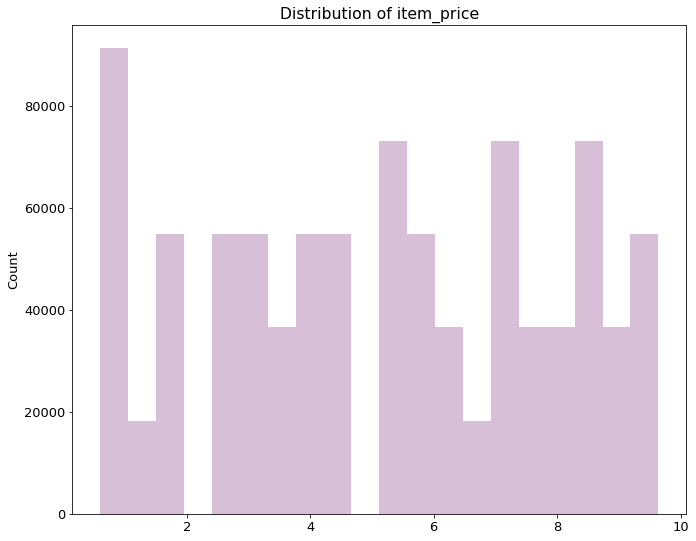

In [24]:
hist_plot(df=df, col='item_price', bins=20)

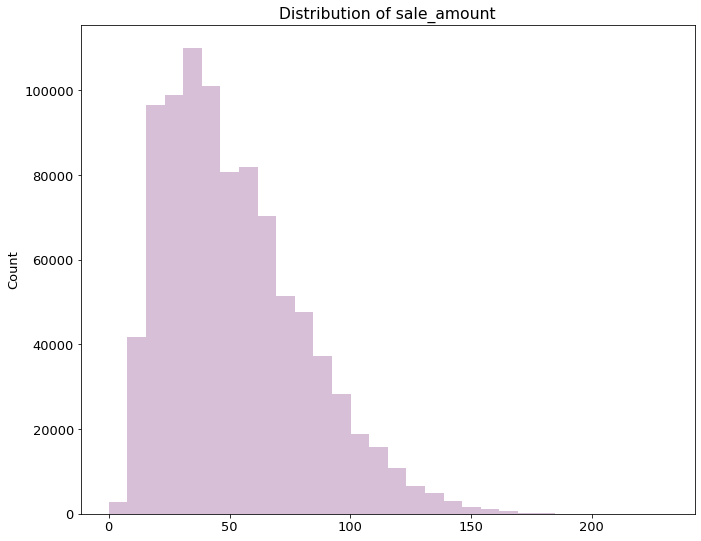

In [25]:
hist_plot(df=df, col='sale_amount', bins=30)

### 4. Date Parts

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.


>**If you have upgraded your pandas, use `.day_name()`, if not, `.weekday_name`. To check your pandas version, `pd.__version__`**


In [26]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### 5. Create New Calculated Column Using .assign()

```python
df = df.assign(new_col_name = your calculation)
```

5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [27]:
df = df.assign(sales_total = df.sale_amount * df.item_price)
df.head(3)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55


### 6. Using .diff()

6. Using `df.diff()` function, create a new column that is the result of the current sales - the previous days sales.

    {default}

```python
df.diff(periods=1, axis=0)
```  

In [28]:
df = df.assign(sales_diff = df.sales_total.diff())
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48


### 7. Build Functions

**Why use the category type instead of the object type? If you're interested, I thought [this article](https://pbpython.com/pandas_dtypes_cat.html) did a great job at speaking to the topic.**

In [75]:
# I'm going to take care of changing some data types here

df = (df.astype({'sale_id': object, 
                 'store_id': object, 
                 'store_zipcode': object, 
                 'item_id': object, 
                 'item_upc12': object, 
                 'item_upc14': object, 
                 'month': 'category', 
                 'weekday': 'category'}))

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   sale_amount    913000 non-null  float64 
 1   sale_id        913000 non-null  object  
 2   store_address  913000 non-null  object  
 3   store_city     913000 non-null  object  
 4   store_id       913000 non-null  object  
 5   store_state    913000 non-null  object  
 6   store_zipcode  913000 non-null  object  
 7   item_brand     913000 non-null  object  
 8   item_id        913000 non-null  object  
 9   item_name      913000 non-null  object  
 10  item_price     913000 non-null  float64 
 11  item_upc12     913000 non-null  object  
 12  item_upc14     913000 non-null  object  
 13  month          913000 non-null  category
 14  weekday        913000 non-null  category
 15  sales_total    913000 non-null  float64 
 16  sales_diff

In [31]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='thistle')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

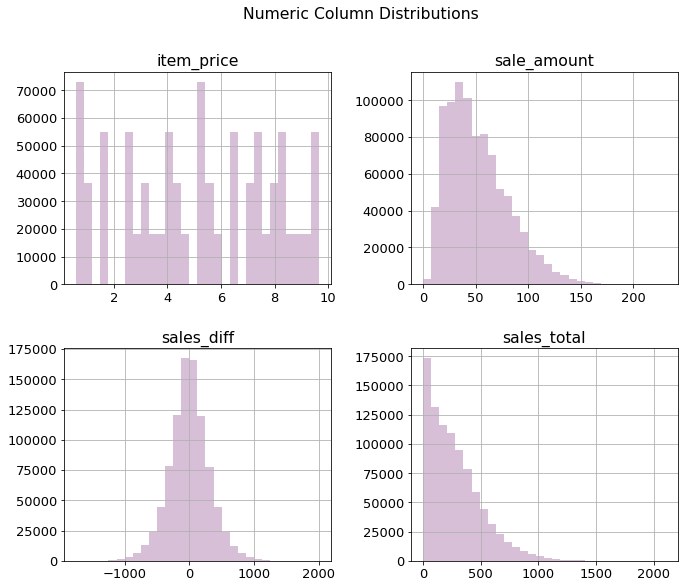

In [32]:
numeric_hists(df, bins=30)

In [33]:
def prepped_store_df():
    """
    Function to acquire and prepare
    store dataframe and show
    distributions for numeric columns
    """
    # Acquire the df
    df = get_store_data()
    
    # Create date part columns
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    
    # Create calculated columns
    df = df.assign(sales_total = df.sale_amount * df.item_price)
    df = df.assign(sales_diff = df.sales_total.diff(periods=1))
    
    # Change dtypes of numeric columns to object and category
    df = (df.astype({'sale_id': object, 
                     'store_id': object, 
                     'store_zipcode': object, 
                     'item_id': object, 
                     'item_upc12': object, 
                     'item_upc14': object, 
                     'month': 'category', 
                     'weekday': 'category'}))
    
    # Display distributions of numeric columns
    numeric_hists(df)
    
    return df

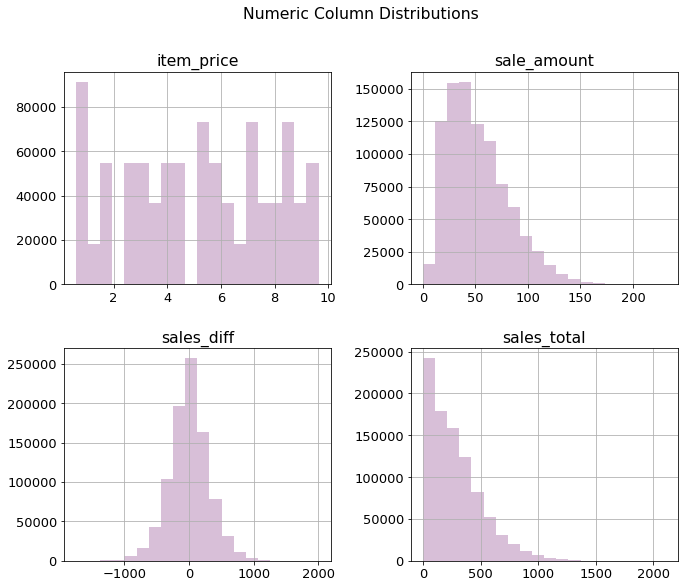

In [34]:
df = prepped_store_df()

In [35]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48


## Acuire OPS German Energy df

In [36]:
gdf = german_energy_csv()
gdf.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


In [37]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


### 1-4 Prepare German Energy df

1. Convert date column to datetime format. <font color=red>(I already did this in acquire.)</font>


2. Plot the distribution of each of your variables. <font color=red>(Use function from above.)</font>

```python
numeric_hists(gdf)
```

3. Set the index to be the datetime variable. <font color=red>(I already did this in acquire.)</font>

```python
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'```
```python
df = pd.read_csv(url, parse_dates=True, index_col='Date')
```


4. Add a month and a year column to your dataframe.

In [38]:
gdf['month'] = gdf.index.month.astype('category')
gdf['year'] = gdf.index.year.astype('category')

In [39]:
gdf.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


### 5. Build Function

In [40]:
def prepped_energy():
    """
    Function the acquires and returns 
    a prepared df for the OPS German Energy data
    and displays historgrams for numeric columns
    """
    # Acquire Datetime df
    gdf = german_energy_csv()
    
    # Create new date part columns as category dtypes
    gdf['month'] = gdf.index.month.astype('category')
    gdf['year'] = gdf.index.year.astype('category')
    
    # Plot numeric column distributions
    numeric_hists(gdf)
    
    return gdf

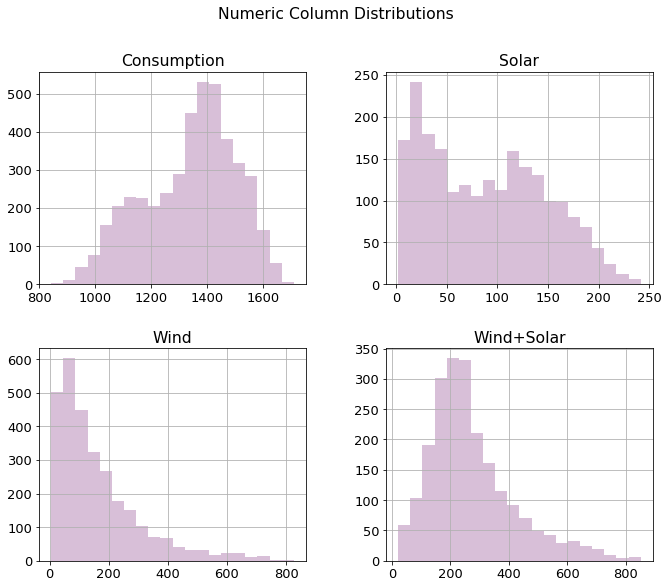

In [41]:
gdf = prepped_energy()

In [42]:
gdf.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


In [43]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Consumption  4383 non-null   float64 
 1   Wind         2920 non-null   float64 
 2   Solar        2188 non-null   float64 
 3   Wind+Solar   2187 non-null   float64 
 4   month        4383 non-null   category
 5   year         4383 non-null   category
dtypes: category(2), float64(4)
memory usage: 180.6 KB


## Acquire San Francisco Temps DataFrame

In [44]:
from vega_datasets import data

sfdf = data.sf_temps()
sfdf.head(2)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00


In [45]:
sfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [46]:
# Convert sfdf to a DateTime Series df

sfdf['date'] = pd.to_datetime(sfdf.date)
sfdf = sfdf.set_index('date').sort_index()
sfdf.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


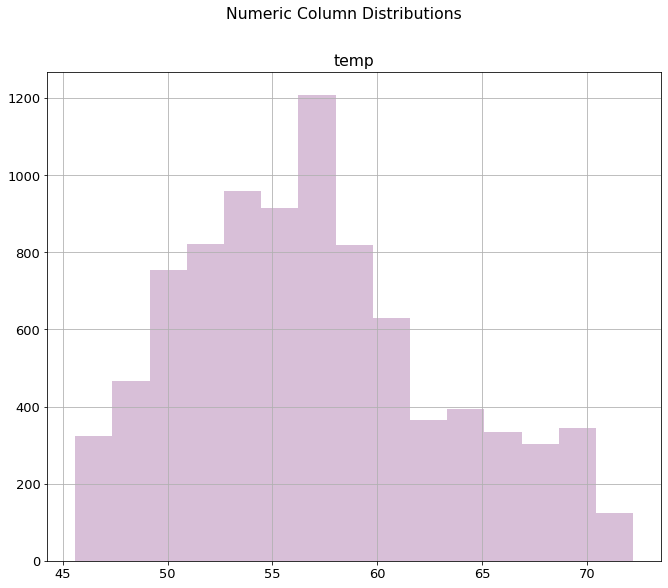

In [47]:
numeric_hists(sfdf, bins=15)

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

>One awesome feature of DateTime Index is simplicity in plotting, as matplotlib will automatically treat it as x axis, so we don’t need to explicitly specify anything.

```python
datetime_index_df.col.plot(kind='bar', color='thistle)
```

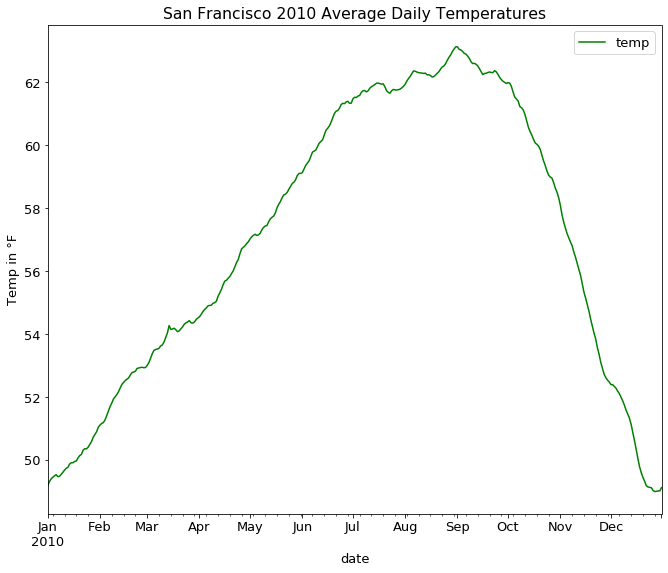

In [48]:
# resample by D and get average daily temp, (shift + option + 8 == degree symbol)

sfdf.resample('D').mean().plot(color='green')

plt.title('San Francisco 2010 Average Daily Temperatures')
plt.ylabel('Temp in °F')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

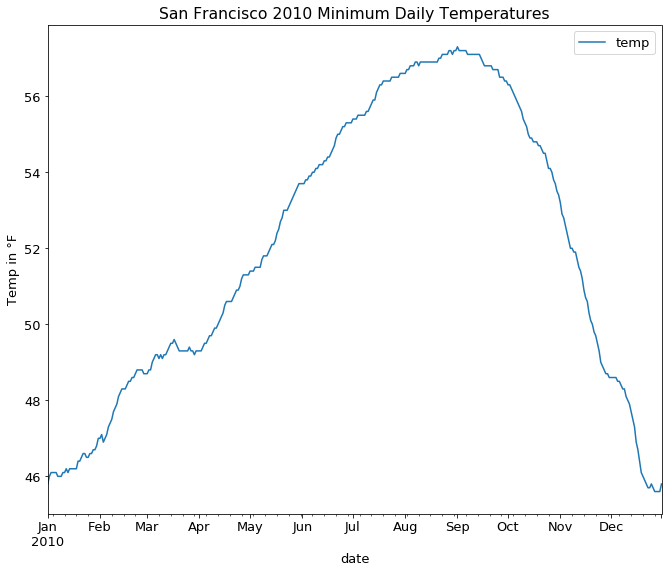

In [49]:
# resample by D and get minimum daily temp, (shift + option + 8 == degree symbol)

sfdf.resample('D').min().plot()

plt.title('San Francisco 2010 Minimum Daily Temperatures')
plt.ylabel('Temp in °F')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.


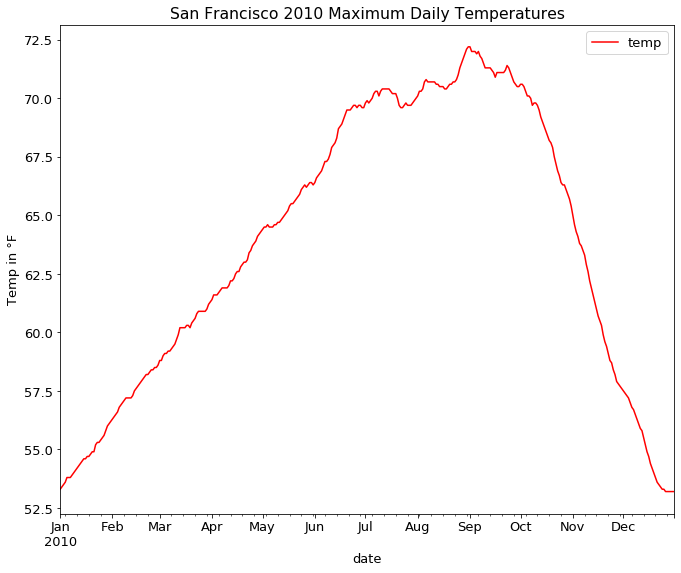

In [50]:
# resample by D and get maximum daily temp, (shift + option + 8 == degree symbol)

sfdf.resample('D').max().plot(color='red')

plt.title('San Francisco 2010 Maximum Daily Temperatures')
plt.ylabel('Temp in °F')
plt.show()

### 4. Which month is the coldest, on average?


In [51]:
# Here I wanted to see the coldest month and the temp, so I used .loc to pull up observation by index

sfdf.loc[sfdf.resample('M').mean().idxmin()]

,temp
date,
2010-01-31,49.4


### 5. Which month has the highest average temperature?


In [52]:
# Here I wanted to see the hotest month and the temp, so I used .loc to pull up observation by index

sfdf.loc[sfdf.resample('M').mean().idxmax()]

,temp
date,
2010-09-30,58.1


### 6. Resample by the day and calculate the min and max temp for the day. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

- Hint: `.agg(['min', 'max'])`

In [54]:
# resample by day and get min and max temps in df
min_max = sfdf.resample('D').agg(['min', 'max'])
min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [55]:
# take care of multi-index of df

min_max.columns = ['min_temp', 'max_temp']
min_max.head()

,min_temp,max_temp
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [56]:
# create temp_range column

min_max['temp_range'] = min_max.max_temp - min_max.min_temp
min_max.head()

,min_temp,max_temp,temp_range
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [57]:
# return min, max, and max temp_range for month with highest range

min_max.loc[min_max.temp_range.idxmax()]

min_temp      57.2
max_temp      72.2
temp_range    15.0
Name: 2010-08-31 00:00:00, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot.

- i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [59]:
# Create agg df

temp_agg = sfdf.resample('D').agg(['min', 'mean', 'max'])
temp_agg.head(2)

temp                 
             min       mean   max
date                             
2010-01-01  45.8  49.170833  53.3
2010-01-02  46.0  49.304167  53.4

In [60]:
# Handle multi-index

temp_agg.columns = ['min_temp', 'mean_temp', 'max_temp']
temp_agg.head(2)

,min_temp,mean_temp,max_temp
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4


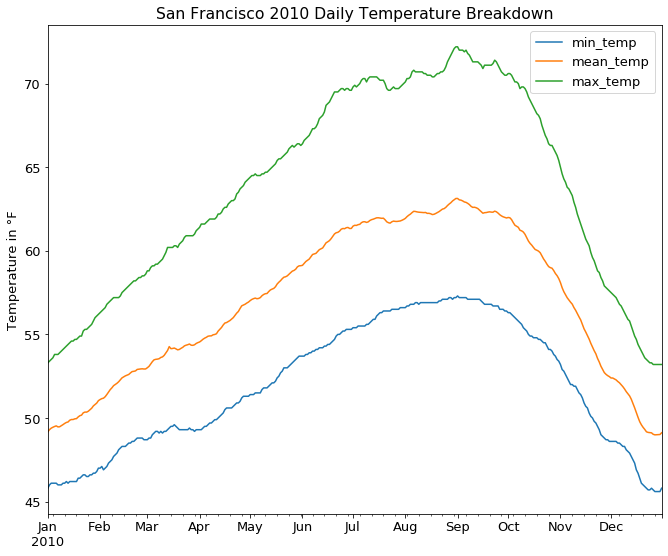

In [79]:
temp_agg.plot()

plt.legend()
plt.title('San Francisco 2010 Daily Temperature Breakdown')
plt.xlabel('')
plt.ylabel('Temperature in °F')
plt.show()

## Acquire flights 

In [62]:
fdf = data.flights_20k()
fdf.head(2)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP


### Convert df to DateTime Index

In [63]:
# Convert sfdf to a DateTime Series df

fdf['date'] = pd.to_datetime(fdf.date)
fdf = fdf.set_index('date').sort_index()
fdf.head(2)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI


In [64]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


In [65]:
# First datetime in dataset is January 1 at 1 AM

fdf.index.min()

Timestamp('2001-01-01 00:01:00')

In [66]:
# Last datetime in dataset is March 31 at 9:30

fdf.index.max()

Timestamp('2001-03-31 21:30:00')

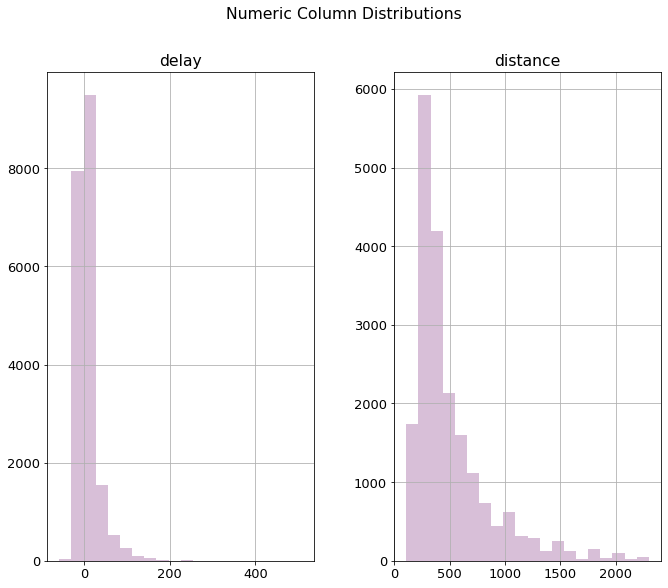

In [67]:
# This is some skewed data!

numeric_hists(fdf)

### 1. Convert any negative delays to 0.

In [68]:
# Use original for quick visual check .where() is working.

fdf.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [86]:
 # df.col = np.where(this_is_true, do_this, else_do_that)

fdf.delay = np.where(fdf.delay < 0, 0, fdf.delay)
fdf.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,0,251,MDW,STL,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday


In [46]:
# Here I validate that I have replaced negative numbers in delay

fdf[fdf.delay < 0]

,delay,distance,origin,destination
date,,,,


### 2. Which hour of the day has the highest average delay?

In [47]:
# I'm going to create a column for hour, so I can groupby hour

fdf['hour'] = fdf.index.hour.astype('category')
fdf.head(2)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,0,0,0,6


In [48]:
# I groupby hour and find the mean value for delay for each hour
# I sort the values to find that 3 PM has the highest value for average delay

fdf.groupby('hour')[['delay']].mean().sort_values(by='delay', ascending=False)

,delay
hour,
3,302.500000
1,170.000000
0,127.916667
23,65.353846
22,32.704607
21,21.626768
20,17.889778
19,16.256557
18,14.514218


### 3. Does the day of the week make a difference in the delay amount?

In [69]:
# Add column for the day of the week, so I can groupby weekday

fdf['weekday'] = fdf.index.day_name()
fdf.head(2)

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday


In [70]:
# I groupby the weekday and examine the average delay

fdf.groupby('weekday')[['delay']].mean().sort_values('delay', ascending=False)

,delay
weekday,
Friday,15.594452
Thursday,10.245766
Wednesday,8.161416
Sunday,7.255164
Tuesday,6.198981
Saturday,4.667520
Monday,3.595973


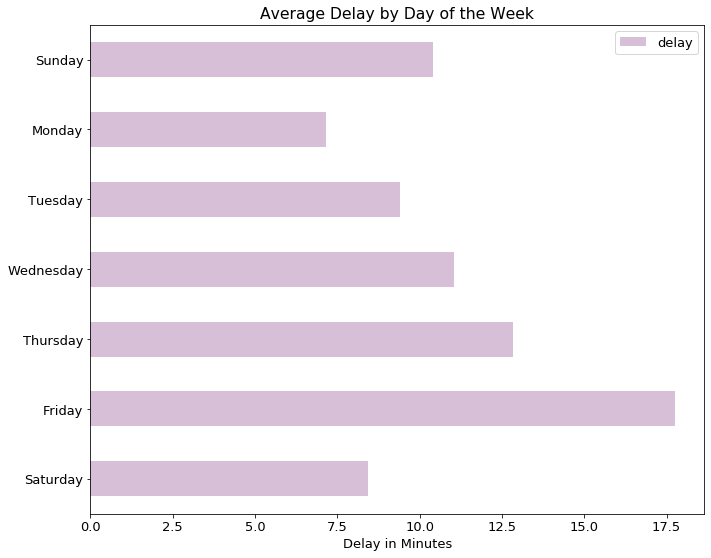

In [101]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cats.reverse()

fdf.groupby('weekday')[['delay']].mean().reindex(cats).plot(kind='barh', color='thistle')
plt.title('Average Delay by Day of the Week')
plt.ylabel('')
plt.xlabel('Delay in Minutes')
plt.show()

In [51]:
# Interesting. I wanted to see the weekday/hour combo with the highest avg delay
# Friday at 3 PM tops the charts; people are flying home and away from home.

fdf.groupby(['weekday', 'hour'])[['delay']].mean().idxmax()

delay    (Friday, 3)
dtype: object

### 4. Does the month make a difference in the delay amount?

In [52]:
# Create a month column to groupby month. This dataset contains Jan, Feb, March

fdf['month'] = fdf.index.month.astype('category')
fdf.month.value_counts(dropna=False)

3    6960
1    6784
2    6256
Name: month, dtype: int64

In [53]:
# I groupby month to examine the average delay by month
# It looks like February, typically the coldest month of the year in the N. Hemisphere,
# has slightly more delay time on average than January

fdf.groupby('month')[['delay']].mean().sort_values(by='delay', ascending=False)

,delay
month,
2,12.306106
1,11.301592
3,9.875287


### Just Curious Stuff...

In [54]:
# February at 3 PM had the highest average delay

fdf.groupby(['month', 'hour'])[['delay']].mean().sort_values(by='delay', ascending=False)

delay
month hour            
2     3     360.000000
1     3     245.000000
      1     170.000000
2     0     167.000000
3     0     123.500000
...                ...
      5       0.705882
2     5       0.000000
      1            NaN
3     1            NaN
      3            NaN

[66 rows x 1 columns]

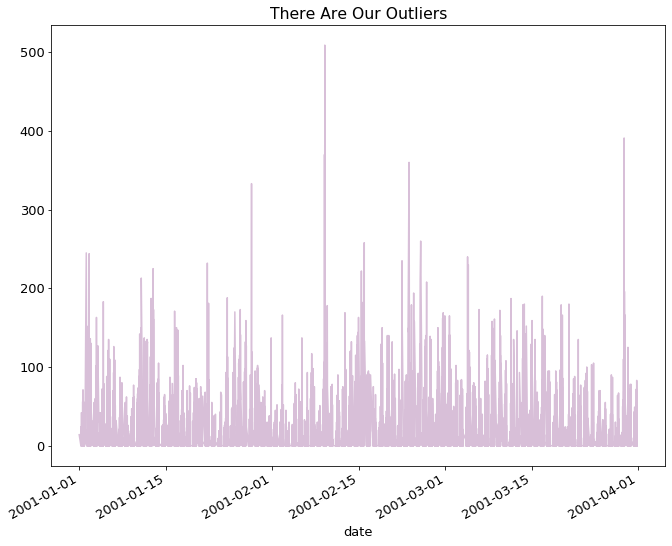

In [56]:
fdf.delay.plot(color='thistle')

plt.title('There Are Our Outliers')
plt.show()

In [57]:
fdf[fdf.month == 2].sort_values(by='delay', ascending=False)

,delay,distance,origin,destination,hour,weekday,month
date,,,,,,,
2001-02-09 13:30:00,509,237,MCI,STL,13,Friday,2
2001-02-09 12:20:00,370,405,MCI,MDW,12,Friday,2
2001-02-23 03:25:00,360,239,DAL,HOU,3,Friday,2
2001-02-25 00:22:00,260,368,LAS,SLC,0,Sunday,2
2001-02-15 22:13:00,258,319,DAL,MAF,22,Thursday,2
...,...,...,...,...,...,...,...
2001-02-12 11:10:00,0,0,0,0,11,Monday,2
2001-02-01 16:45:00,0,0,0,0,16,Thursday,2
2001-02-12 11:25:00,0,0,0,0,11,Monday,2


In [88]:
# Here is our longest delay. The 0 value for delay makes the delay average for this month, day, time combo drop substantially. 

fdf.loc[fdf.delay.idxmax()]

,delay,distance,origin,destination,hour,weekday,month
date,,,,,,,
2001-02-09 13:30:00,509,237,MCI,STL,13,Friday,2
2001-02-09 13:30:00,0,0,0,0,13,Friday,2


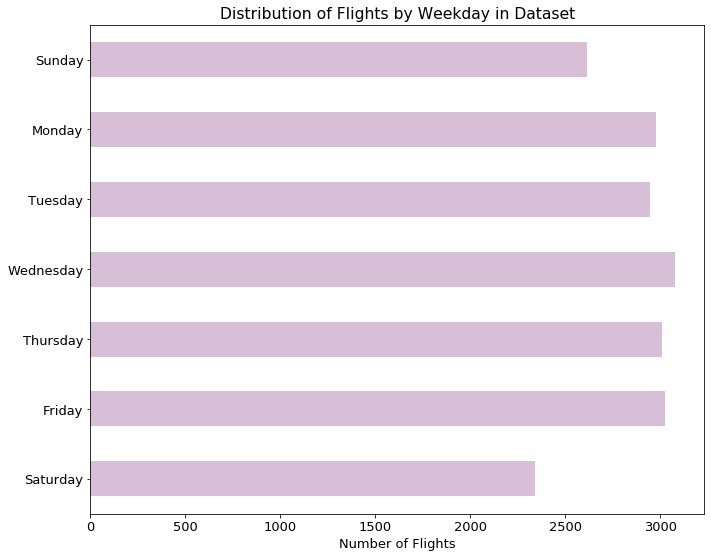

In [106]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cats.reverse()

fdf.weekday.value_counts().reindex(cats).plot(kind='barh', color='thistle')

plt.ylabel('')
plt.xlabel('Number of Flights')
plt.xticks(rotation=0)
plt.title('Distribution of Flights by Weekday in Dataset')
plt.show()

In [90]:
fdf.weekday.value_counts(ascending=False)

Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: weekday, dtype: int64

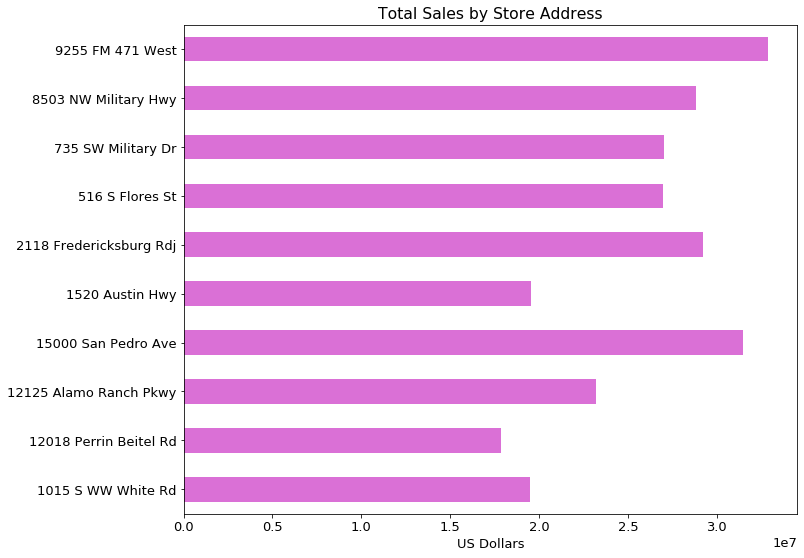

In [105]:
# I was curious about store sales by location

df.groupby('store_address').sales_total.sum().plot(kind='barh', color='orchid')

plt.title('Total Sales by Store Address')
plt.ylabel('')
plt.xlabel('US Dollars')
plt.show()

In [132]:
# What were stores selling the most of?

df.groupby('store_address')[['sale_amount', 'item_name']].max().sort_values(by='sale_amount', ascending=False)

,sale_amount,item_name
store_address,,
9255 FM 471 West,231.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
15000 San Pedro Ave,204.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
2118 Fredericksburg Rdj,196.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
735 SW Military Dr,195.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
8503 NW Military Hwy,187.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
516 S Flores St,186.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
12125 Alamo Ranch Pkwy,155.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
1015 S WW White Rd,134.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...
1520 Austin Hwy,130.0,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...


In [133]:
# What were stores selling the least of?

df.groupby('store_address')[['sale_amount', 'item_name']].min().sort_values(by='sale_amount', ascending=False)

,sale_amount,item_name
store_address,,
15000 San Pedro Ave,4.0,Ahold Cocoa Almonds
516 S Flores St,4.0,Ahold Cocoa Almonds
735 SW Military Dr,4.0,Ahold Cocoa Almonds
2118 Fredericksburg Rdj,3.0,Ahold Cocoa Almonds
8503 NW Military Hwy,3.0,Ahold Cocoa Almonds
9255 FM 471 West,3.0,Ahold Cocoa Almonds
1520 Austin Hwy,2.0,Ahold Cocoa Almonds
12018 Perrin Beitel Rd,1.0,Ahold Cocoa Almonds
12125 Alamo Ranch Pkwy,1.0,Ahold Cocoa Almonds
